# **Problem statement**

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# **Data Collection**

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("students.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

**Data Checks to Perform**

*   Check Missing values
*   Check Duplicates
*   Check data type
*   Check the number of unique values of each column
*   Check statistics of data set
*   Check various categories present in the different categorical column





**Checking for Missing Data**

In [84]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
total score,0
AVG,0


**There are no missing values in the data set**

**Checking for duplicates**

In [5]:
df.duplicated().sum()

0

**No Duplicates**

***Checking dataTypes***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


***Checking for number of unique values***

In [7]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


***Checking Statistics of Data***

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


***Insight***

* From above description of numerical data, all means are
very close to each other - between 66 and 68.05;

* All standard deviations are also close - between 14.6 and 15.19;

* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

# **Exploring Data**

In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# ***Adding columns for "Total Score" and "Average"***

In [13]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['AVG'] = df['total score']//3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,AVG
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82
2,female,group B,master's degree,standard,none,90,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,male,group C,some college,standard,none,76,78,75,229,76


In [18]:
reading_full = df[df['reading score'] == 100]['AVG'].count()
writing_full = df[df['writing score'] == 100]['AVG'].count()
math_full = df[df['math score'] == 100]['AVG'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [20]:
reading_less_20 = df[df['reading score'] <= 20]['AVG'].count()
writing_less_20 = df[df['writing score'] <= 20]['AVG'].count()
math_less_20 = df[df['math score'] <= 20]['AVG'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights**

* From above values we get students have performed the worst in Maths
* Best performance is in reading section

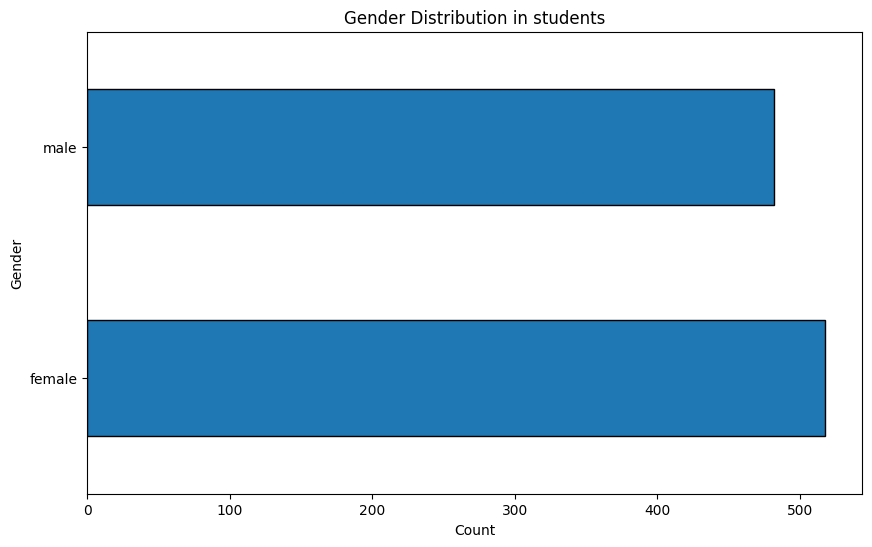

In [4]:
df['gender'].value_counts().plot(kind='barh', figsize=(10,6), edgecolor = 'black')
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Gender Distribution in students")
plt.show()

we can observe almost equal distribution of students

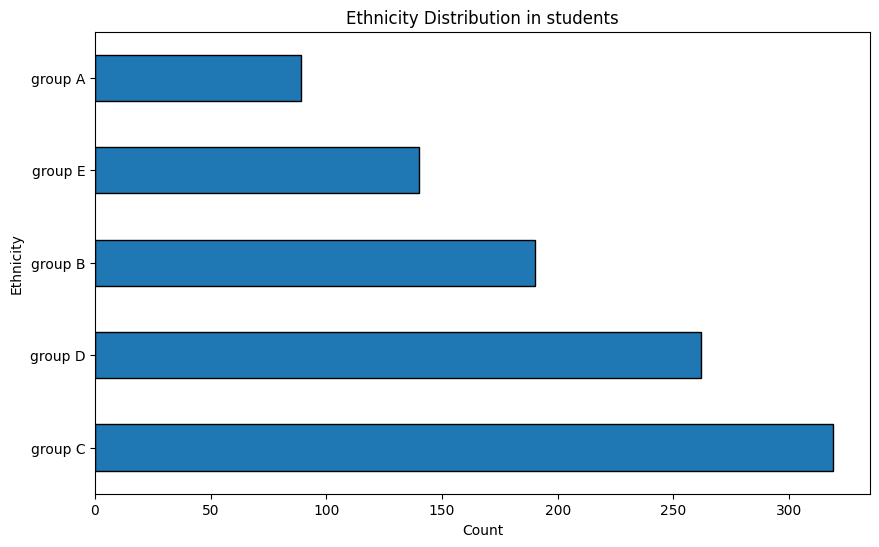

In [5]:
df['race/ethnicity'].value_counts().plot(kind='barh', figsize=(10,6), edgecolor = 'black')
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.title("Ethnicity Distribution in students")
plt.show()

the ethnic groups C and D are more in population

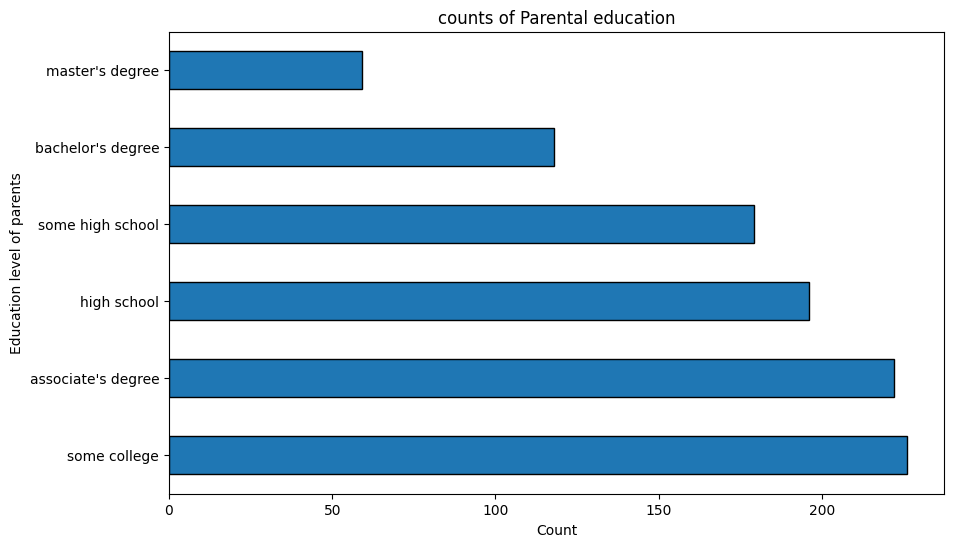

In [6]:
df['parental level of education'].value_counts().plot(kind='barh', figsize=(10,6), edgecolor = 'black')
plt.xlabel("Count")
plt.ylabel("Education level of parents")
plt.title("counts of Parental education")
plt.show()

most of the parents of the students have some college and associate's degree

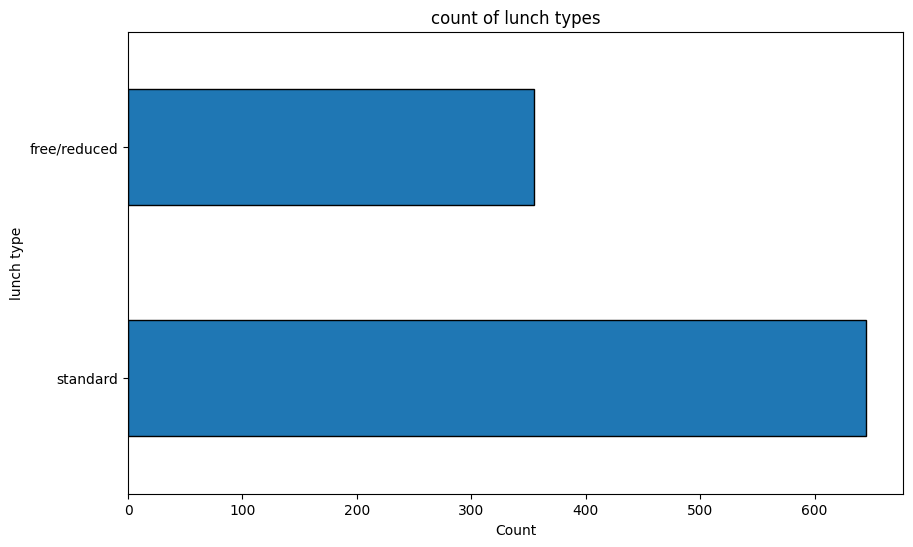

In [7]:
df['lunch'].value_counts().plot(kind='barh', figsize=(10,6), edgecolor = 'black')
plt.xlabel("Count")
plt.ylabel("lunch type")
plt.title("count of lunch types")
plt.show()

most of students have standard lunch but the reduced/free category is also not less

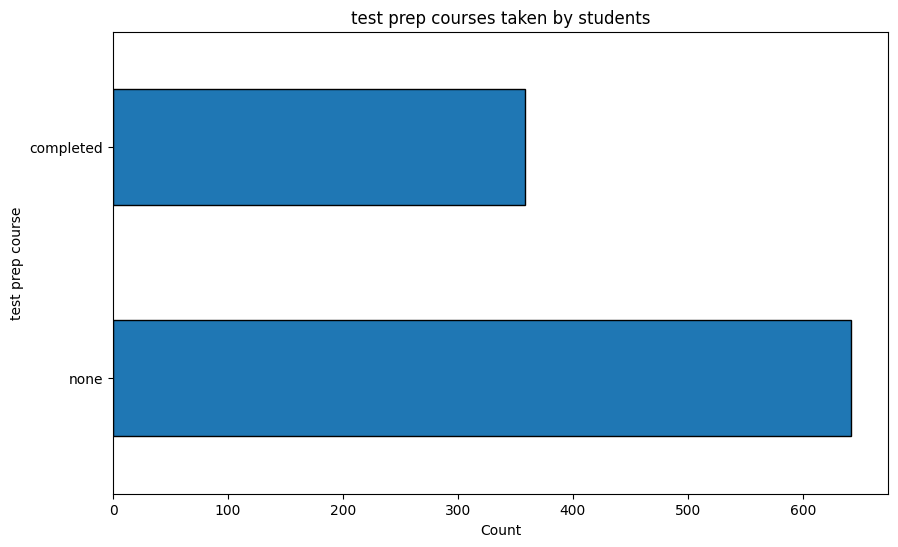

In [8]:
df['test preparation course'].value_counts().plot(kind='barh', figsize=(10,6), edgecolor = 'black')
plt.xlabel("Count")
plt.ylabel("test prep course")
plt.title("test prep courses taken by students")
plt.show()

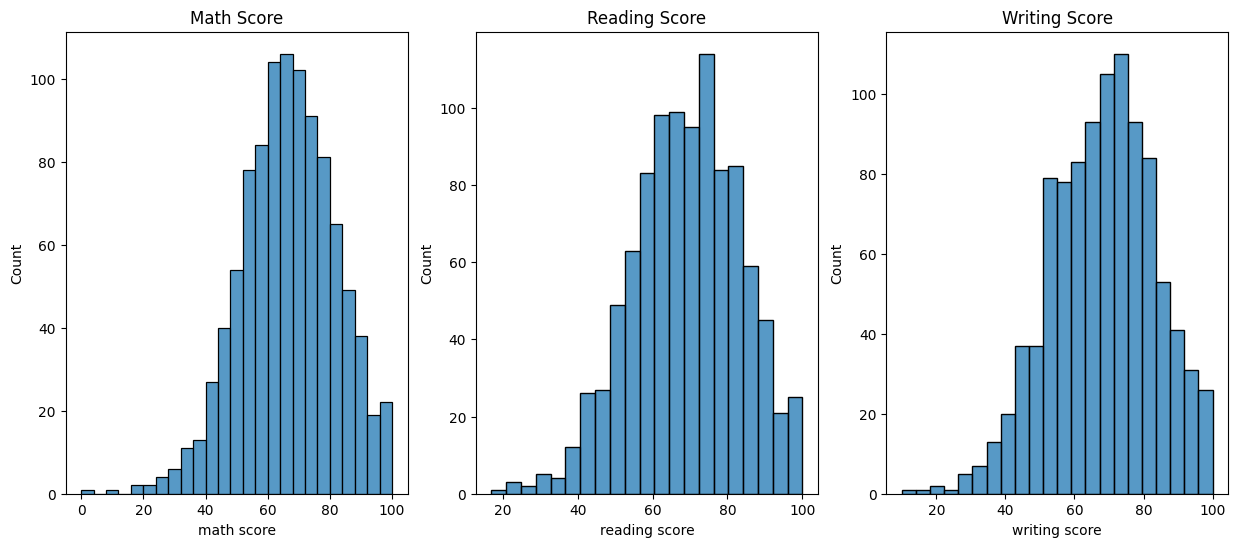

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.histplot(df, x="math score", fill=True, ax=axes[0])
sns.histplot(df, x="reading score", fill=True, ax=axes[1])
sns.histplot(df, x="writing score", fill=True, ax=axes[2])
axes[0].set_title("Math Score")
axes[1].set_title("Reading Score")
axes[2].set_title("Writing Score")
# plt.tight_layout()

plt.show()

In [59]:
df['AVG'] = (df['math score']+df['reading score']+df['writing score'])//3

<Axes: xlabel='AVG', ylabel='Count'>

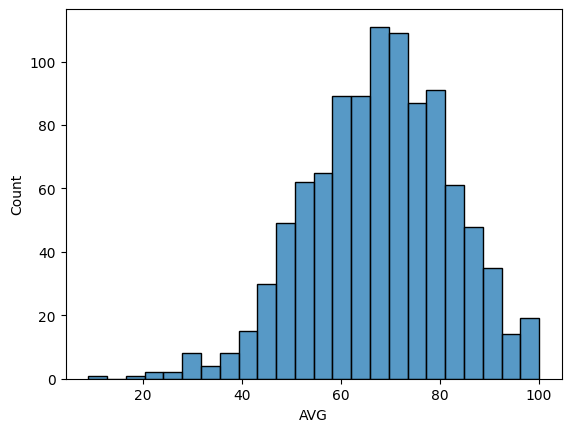

In [54]:
sns.histplot(df, x="AVG", fill=True)

**Relation between all the columns and Gender**

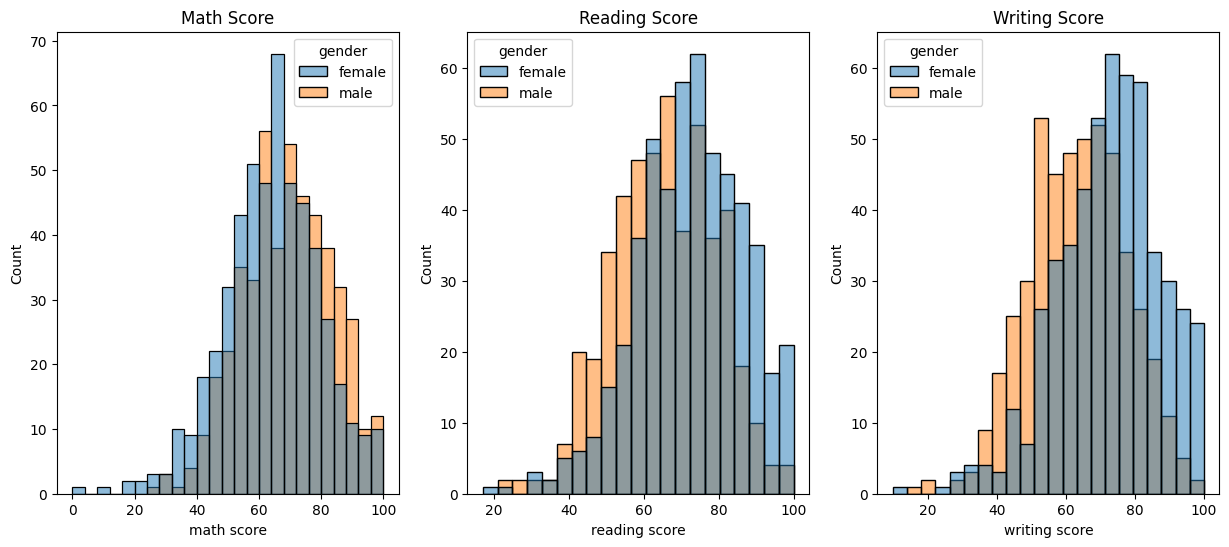

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.histplot(df, x="math score", fill=True, ax=axes[0], hue='gender')
sns.histplot(df, x="reading score", fill=True, ax=axes[1], hue='gender')
sns.histplot(df, x="writing score", fill=True, ax=axes[2], hue='gender')
axes[0].set_title("Math Score")
axes[1].set_title("Reading Score")
axes[2].set_title("Writing Score")
# plt.tight_layout()

plt.show()

<Axes: xlabel='AVG', ylabel='Count'>

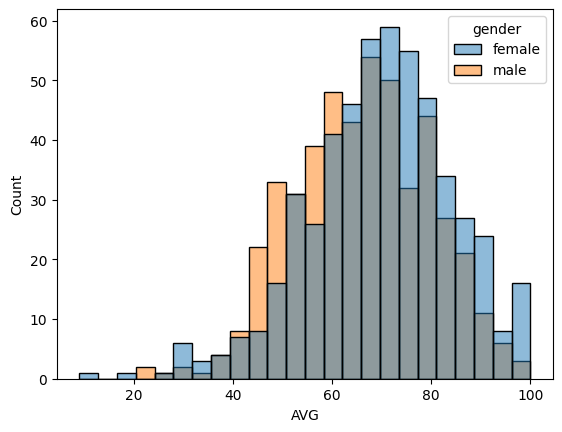

In [55]:
sns.histplot(df, x="AVG", fill=True, hue='gender')

In [70]:
print(df['AVG'][df['gender'] == 'male'].mean())
print(df['AVG'][df['gender'] == 'female'].mean())
print(df['AVG'][df['gender'] == 'male'].mode().iloc[0])
print(df['AVG'][df['gender'] == 'female'].mode().iloc[0])

65.51659751037344
69.23938223938224
68
72


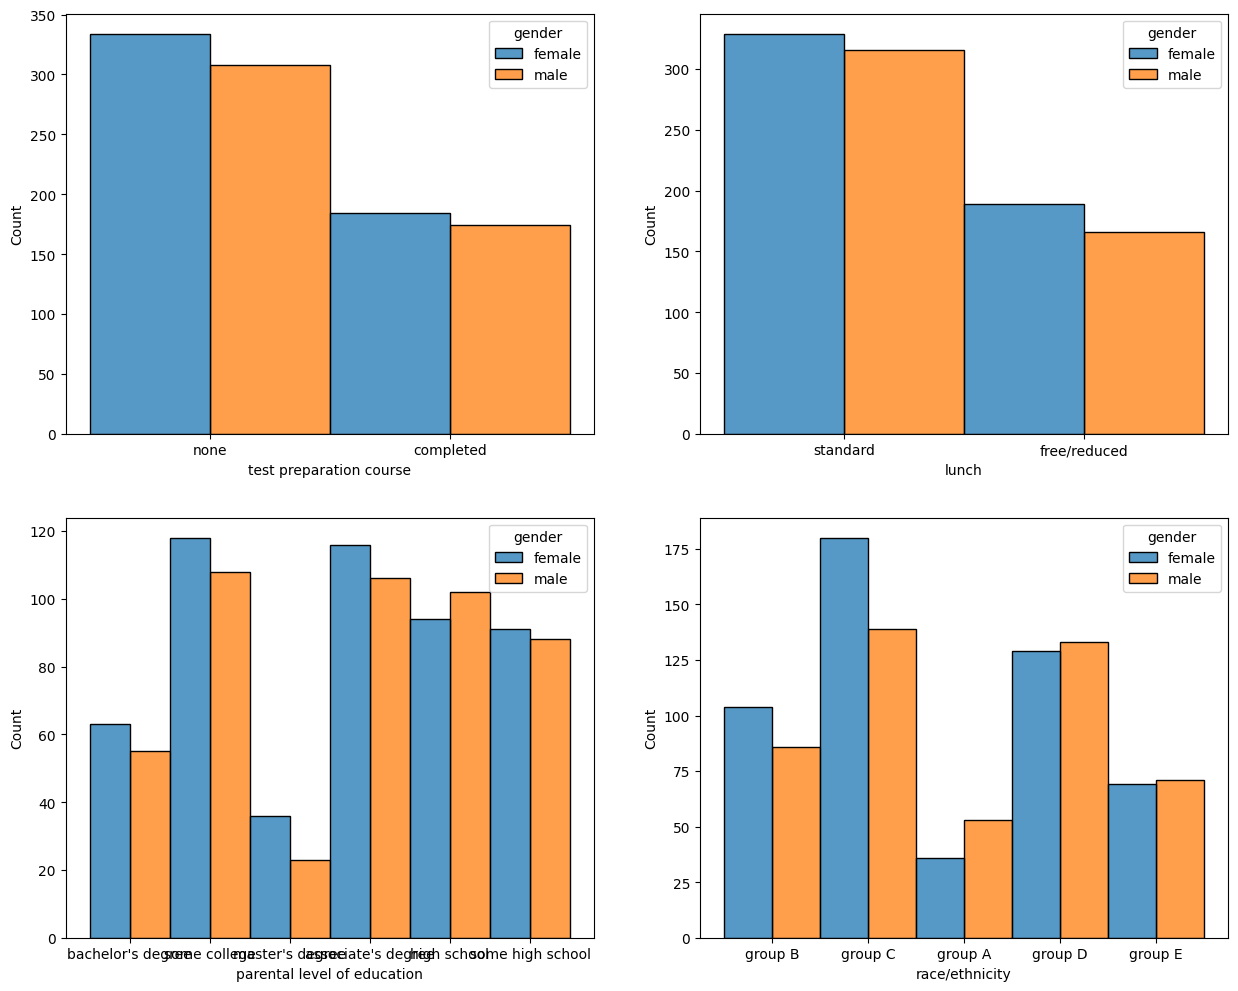

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,12))
sns.histplot(df, x="test preparation course", fill=True, hue='gender', multiple = 'dodge', ax = axes[0][0])
sns.histplot(df, x="lunch", fill=True, hue='gender', multiple = 'dodge', ax = axes[0][1])
sns.histplot(df, x="parental level of education", fill=True, hue='gender', multiple = 'dodge', ax = axes[1][0])
sns.histplot(df, x="race/ethnicity", fill=True, hue='gender', multiple = 'dodge', ax = axes[1][1])
#plt.tight_layout()

plt.show()

**Test Preparation course's effect on Performance of students**

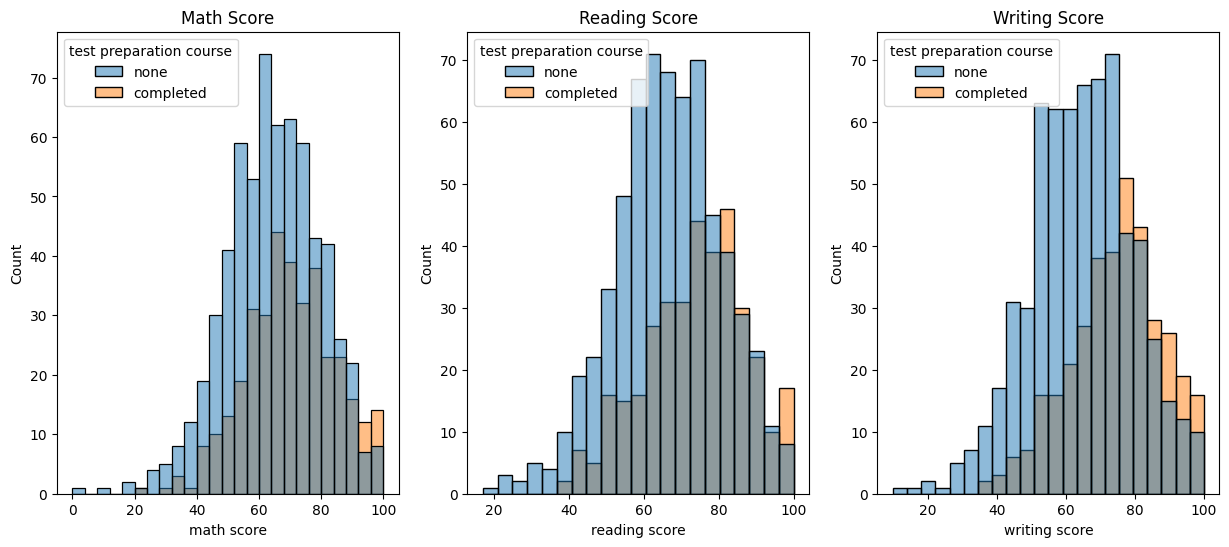

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.histplot(df, x="math score", fill=True, ax=axes[0], hue='test preparation course')
sns.histplot(df, x="reading score", fill=True, ax=axes[1], hue='test preparation course')
sns.histplot(df, x="writing score", fill=True, ax=axes[2], hue='test preparation course')
axes[0].set_title("Math Score")
axes[1].set_title("Reading Score")
axes[2].set_title("Writing Score")
# plt.tight_layout()

plt.show()

<Axes: xlabel='AVG', ylabel='Count'>

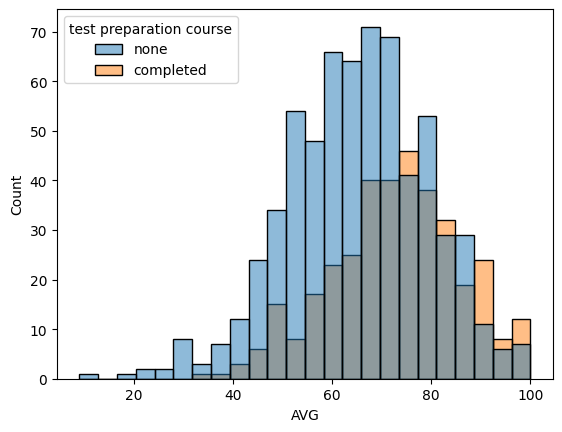

In [57]:
sns.histplot(df, x="AVG", fill=True, hue='test preparation course')

In [69]:
print(df['AVG'][df['test preparation course'] == 'none'].mean())
print(df['AVG'][df['test preparation course'] == 'completed'].mean())
print(df['AVG'][df['test preparation course'] == 'none'].mode().iloc[0])
print(df['AVG'][df['test preparation course'] == 'completed'].mode().iloc[0])

64.71183800623054
72.3463687150838
68
74


**Parental Education vs Students Score**

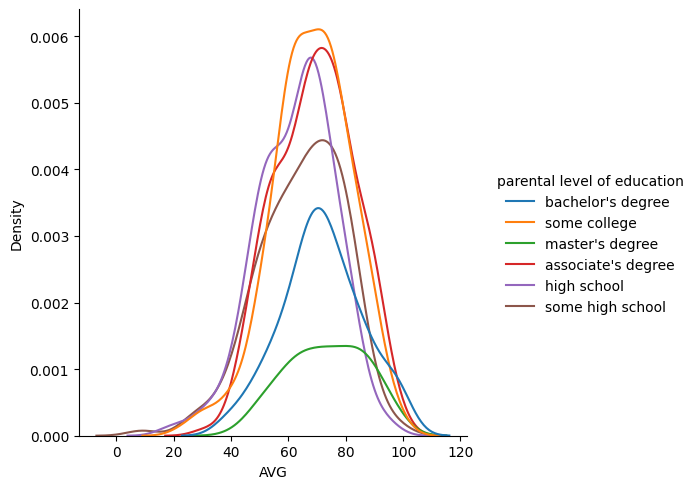

In [77]:
sns.displot(df, x='AVG', hue='parental level of education', kind='kde')

**Race/Ethnicity vs Score**

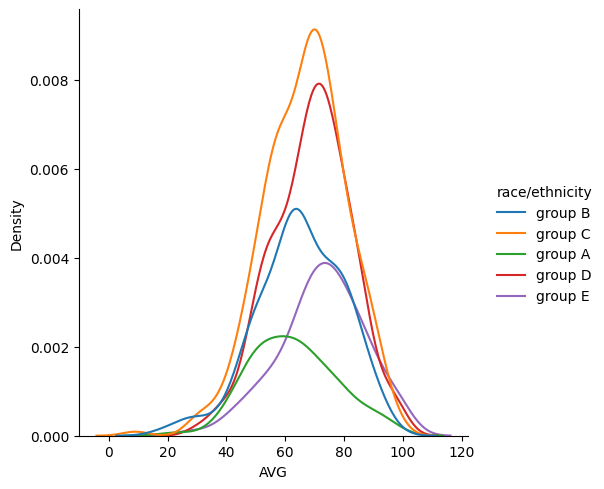

In [78]:
sns.displot(df, x='AVG', hue='race/ethnicity', kind='kde')

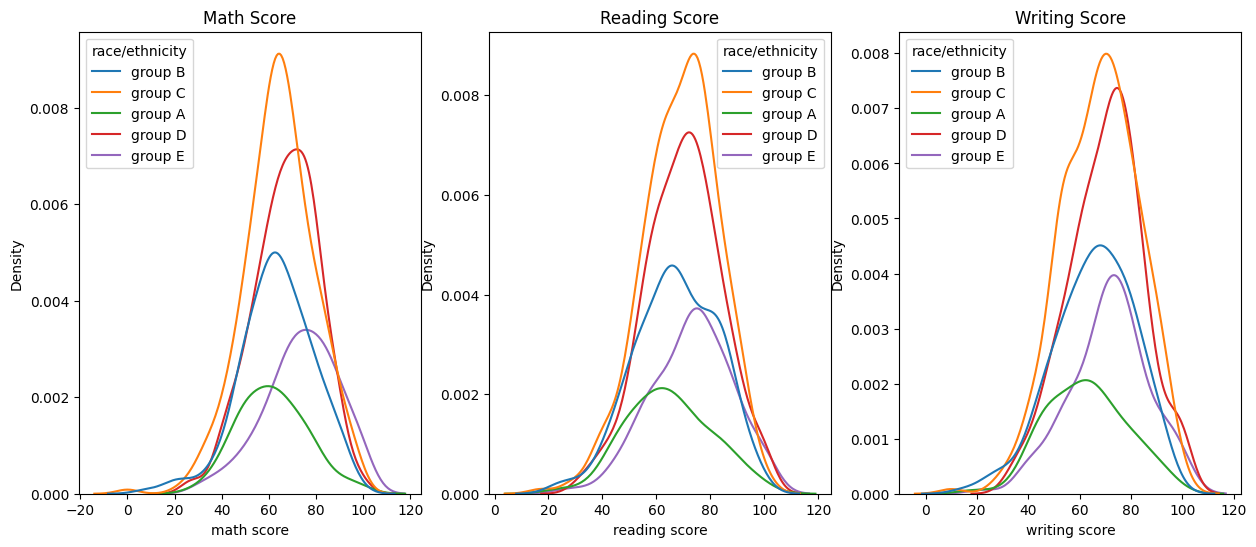

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.kdeplot(df, x="math score", ax=axes[0], hue='race/ethnicity')
sns.kdeplot(df, x="reading score", ax=axes[1], hue='race/ethnicity')
sns.kdeplot(df, x="writing score", ax=axes[2], hue='race/ethnicity')
axes[0].set_title("Math Score")
axes[1].set_title("Reading Score")
axes[2].set_title("Writing Score")
# plt.tight_layout()

plt.show()

**Lunch VS Score**

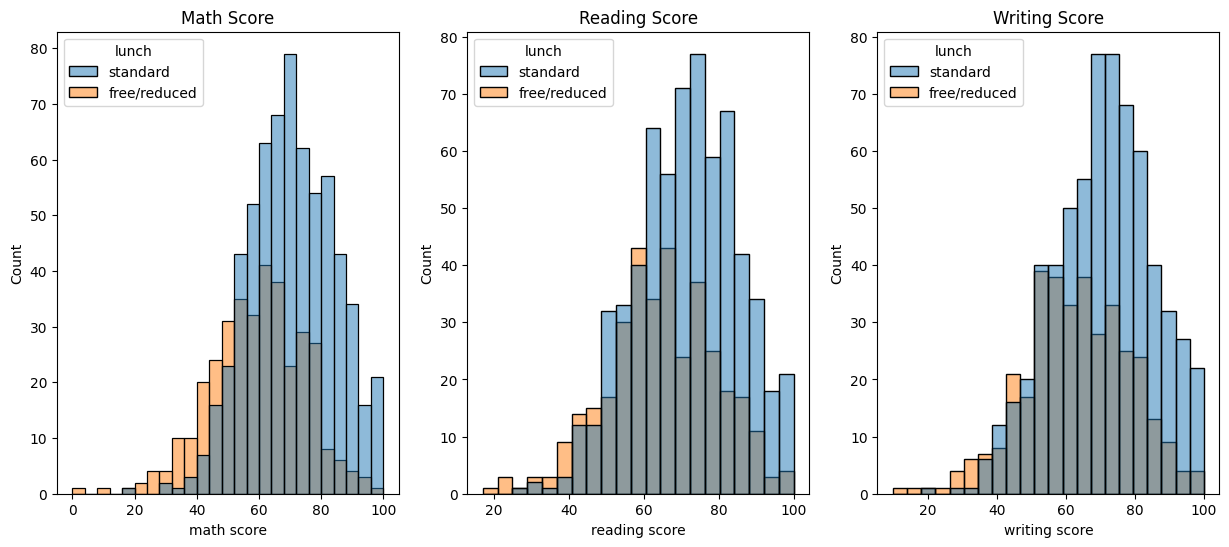

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.histplot(df, x="math score", fill=True, ax=axes[0], hue='lunch')
sns.histplot(df, x="reading score", fill=True, ax=axes[1], hue='lunch')
sns.histplot(df, x="writing score", fill=True, ax=axes[2], hue='lunch')
axes[0].set_title("Math Score")
axes[1].set_title("Reading Score")
axes[2].set_title("Writing Score")
# plt.tight_layout()

plt.show()

<Axes: xlabel='AVG', ylabel='Count'>

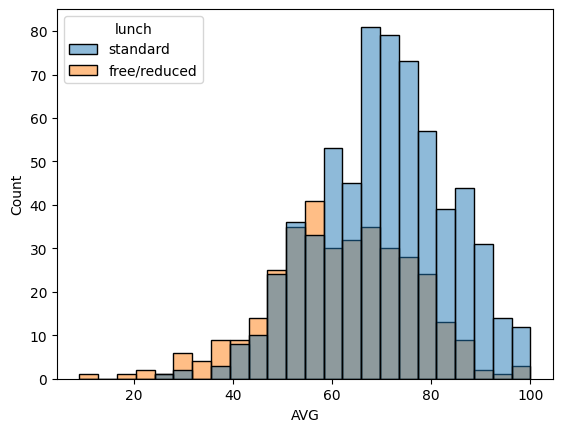

In [83]:
sns.histplot(df, x="AVG", fill=True, hue='lunch')

**Checking for Outliers**

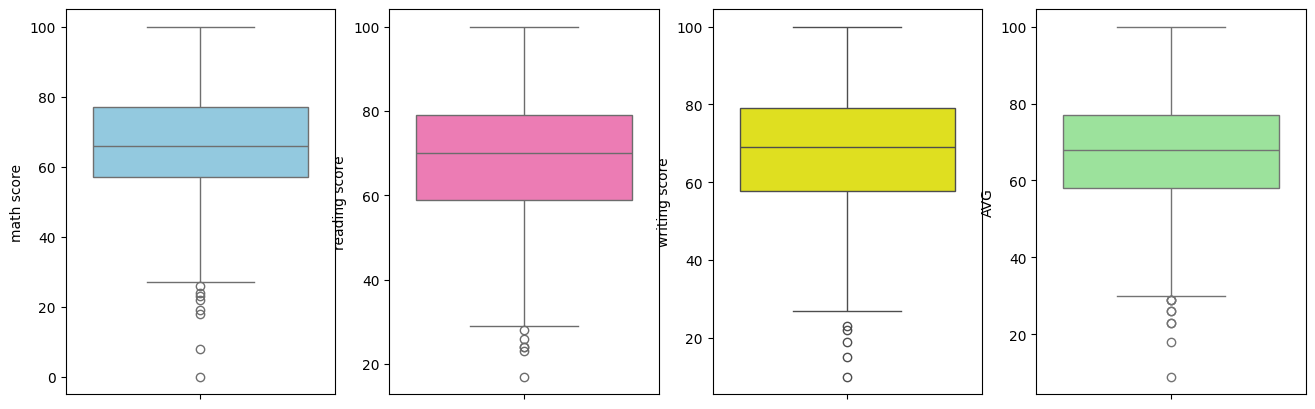

In [22]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['AVG'],color='lightgreen')
plt.show()